# Laboratory work #1
For beginning importing libraries.

In [73]:
# Import scikit-learn libraries
# Import preprocessing lib
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
# Import help function
from  sklearn.model_selection import train_test_split, GridSearchCV
# Import metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
# Import models
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# Import other libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#### Downloading Dataset
Our dataset is Possible Asteroid Impacts with Earth (from [kaggle](https://www.kaggle.com/datasets/nasa/asteroid-impacts))

## Preprocessing Dataset

In [74]:
# Loading dataset to pandas DataFrame
asteroid_df = pd.read_csv("datasets\\asteroid_dataset\\asteroid_classification.csv")

In [3]:
# Getting data from dataframe
print(asteroid_df.head())
# Getting names of column
print("==>Column names<==")
print(f"=>asteroid columns: {asteroid_df.columns.tolist()}")
# Getting size of dataset
print("==>Dataset size<==")
print(f"asteroid shape={asteroid_df.shape}")

    Object Name Object Classification  Epoch (TDB)  Orbit Axis (AU)  \
0      433 Eros         Amor Asteroid        57800           1.4579   
1    719 Albert         Amor Asteroid        57800           2.6385   
2    887 Alinda         Amor Asteroid        57800           2.4787   
3  1036 Ganymed         Amor Asteroid        57800           2.6628   
4     1221 Amor         Amor Asteroid        57800           1.9191   

   Orbit Eccentricity  Orbit Inclination (deg)  Perihelion Argument (deg)  \
0              0.2226                  10.8277                   178.8050   
1              0.5479                  11.5822                   156.1409   
2              0.5671                   9.3561                   350.3482   
3              0.5338                  26.6929                   132.4690   
4              0.4356                  11.8795                    26.6572   

   Node Longitude (deg)  Mean Anomoly (deg)  Perihelion Distance (AU)  \
0              304.3265            31

In [4]:
# Getting info from dataframe
print(asteroid_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15635 entries, 0 to 15634
Data columns (total 15 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Object Name                               15635 non-null  object 
 1   Object Classification                     15635 non-null  object 
 2   Epoch (TDB)                               15635 non-null  int64  
 3   Orbit Axis (AU)                           15635 non-null  float64
 4   Orbit Eccentricity                        15635 non-null  float64
 5   Orbit Inclination (deg)                   15635 non-null  float64
 6   Perihelion Argument (deg)                 15635 non-null  float64
 7   Node Longitude (deg)                      15635 non-null  float64
 8   Mean Anomoly (deg)                        15635 non-null  float64
 9   Perihelion Distance (AU)                  15635 non-null  float64
 10  Aphelion Distance (AU)            

In [75]:
# Drop unnecessary columns for analysis from the dataframe
asteroid_df.drop(["Object Name", "Epoch (TDB)", "Perihelion Argument (deg)", "Node Longitude (deg)",
                          "Mean Anomoly (deg)", "Perihelion Distance (AU)", "Aphelion Distance (AU)",
                          "Minimum Orbit Intersection Distance (AU)", "Orbital Reference"], axis=1, inplace=True)
print(asteroid_df.columns)

Index(['Object Classification', 'Orbit Axis (AU)', 'Orbit Eccentricity',
       'Orbit Inclination (deg)', 'Orbital Period (yr)', 'Asteroid Magnitude'],
      dtype='object')


In [76]:
# Drop null values of dataframe as we have only one null value
asteroid_df.dropna(inplace=True)
asteroid_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15634 entries, 0 to 15634
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Object Classification    15634 non-null  object 
 1   Orbit Axis (AU)          15634 non-null  float64
 2   Orbit Eccentricity       15634 non-null  float64
 3   Orbit Inclination (deg)  15634 non-null  float64
 4   Orbital Period (yr)      15634 non-null  float64
 5   Asteroid Magnitude       15634 non-null  float64
dtypes: float64(5), object(1)
memory usage: 855.0+ KB


In [77]:
# Drop the 90% of data in dataframe
asteroid_df_size = asteroid_df.size
asteroid_df = asteroid_df[:int(asteroid_df_size*0.1)]

In [8]:
# Get the description of the dataframe
print(asteroid_df.describe())

       Orbit Axis (AU)  Orbit Eccentricity  Orbit Inclination (deg)  \
count      9380.000000         9380.000000              9380.000000   
mean          1.786934            0.456994                13.701426   
std           0.599254            0.175598                11.841897   
min           0.547600            0.006200                 0.021000   
25%           1.323325            0.330500                 5.054750   
50%           1.747150            0.467850                 9.792850   
75%           2.221950            0.579025                19.876325   
max          17.818700            0.969500               154.375100   

       Orbital Period (yr)  Asteroid Magnitude  
count          9380.000000         9380.000000  
mean              2.485915           21.578613  
std               1.400086            3.056270  
min               0.410000            9.450000  
25%               1.520000           19.300000  
50%               2.310000           21.200000  
75%              

In [78]:
# View class names
print(set(asteroid_df["Object Classification"]))

{'Apollo Asteroid', 'Aten Asteroid', 'Apohele Asteroid (Hazard)', 'Aten Asteroid (Hazard)', 'Apohele Asteroid', 'Amor Asteroid', 'Apollo Asteroid (Hazard)', 'Amor Asteroid (Hazard)'}


In [80]:
# View count of class names
print(asteroid_df.iloc[:, 0].value_counts())

Apollo Asteroid              3918
Amor Asteroid                3484
Apollo Asteroid (Hazard)     1157
Aten Asteroid                 609
Aten Asteroid (Hazard)        130
Amor Asteroid (Hazard)         71
Apohele Asteroid                8
Apohele Asteroid (Hazard)       3
Name: Object Classification, dtype: int64


In [81]:
# Change class names
asteroid_df["Object Classification"].mask(asteroid_df["Object Classification"] == "Apollo Asteroid" ,
                                          "Apollo", inplace=True)
asteroid_df["Object Classification"].mask(asteroid_df["Object Classification"] == "Aten Asteroid",
                                          "Aten", inplace=True)
asteroid_df["Object Classification"].mask(asteroid_df["Object Classification"] == "Amor Asteroid",
                                          "Amor", inplace=True)
asteroid_df["Object Classification"].mask(asteroid_df["Object Classification"] == "Apohele Asteroid",
                                          "Apohele", inplace=True)
# Drop unnecessary class
necessary_class = ["Apollo", "Aten", "Amor"]
asteroid_df = asteroid_df[asteroid_df["Object Classification"].isin(necessary_class)]

In [68]:
# View class names
print(set(asteroid_df["Object Classification"]))

{'Apohele', 'Apollo', 'Amor', 'Aten'}


In [82]:
# View count of class names
print(asteroid_df.iloc[:, 0].value_counts())

Apollo    3918
Amor      3484
Aten       609
Name: Object Classification, dtype: int64


In [83]:
print(asteroid_df["Object Classification"].head())
print(asteroid_df.info())

0    Amor
1    Amor
2    Amor
3    Amor
4    Amor
Name: Object Classification, dtype: object
<class 'pandas.core.frame.DataFrame'>
Int64Index: 8011 entries, 0 to 9380
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Object Classification    8011 non-null   object 
 1   Orbit Axis (AU)          8011 non-null   float64
 2   Orbit Eccentricity       8011 non-null   float64
 3   Orbit Inclination (deg)  8011 non-null   float64
 4   Orbital Period (yr)      8011 non-null   float64
 5   Asteroid Magnitude       8011 non-null   float64
dtypes: float64(5), object(1)
memory usage: 438.1+ KB
None


## Creating functions for visualise data

In [111]:
def boxplot_data(dataframe, features, target_features):
    """Function to show boxplot of dataframe;
    :param dataframe: pandas DataFrame with data;
    :param features: list with features name from dataframe;
    :param target_features: number of target feature.
    """
    # Define plot variables
    n = len(features)
    cols = 3
    rows = int(n/cols)
    features_iter = 0

    # Build plot
    fig, ax = plt.subplots(nrows=rows, ncols=cols, figsize=(25, 23))
    for i in range(rows):
        for j in range(cols):
            if features_iter == target_features:
                features_iter += 1
                continue
            sns.boxplot(x=features[target_features], y=features[features_iter], data=dataframe, ax=ax[i][j])
            features_iter += 1

    plt.show()

def remove_outliers(dataframe, features):
    """Function to remove the outliers;
    :param dataframe: pandas DataFrame with data;
    :param features: list with features from dataframe.
    """
    # Copy dataframe to another variable
    dataframe_copy = dataframe.copy()

    # Iterate through features
    for feature in features:
        if dataframe[feature].dtype == object:
            continue
        # Calculate q1, q3 and iqr
        q3 = dataframe[feature].quantile(0.75)
        q1 = dataframe[feature].quantile(0.25)
        iqr = q3 - q1

        # Get local minimum and maximum
        local_min = q1 - (1.5 * iqr)
        local_max = q3 + (1.5 * iqr)

        # Remove the outliers
        dataframe_copy = dataframe_copy[(dataframe_copy[feature] >= local_min) &
                                        (dataframe_copy[feature] <= local_max)]

    return dataframe_copy

def histogram_data(dataframe, features):
    """Function to show histogram of dataframe;
    :param dataframe: pandas DataFrame with data;
    :param features: list with features from dataframe.
    """
    # Define plot variables
    n = len(features)
    cols = 3
    rows = int(n/cols)
    features_iter = 1

    # Build plot
    fig, ax = plt.subplots(ncols=cols, figsize=(24, 20))
    for i in range(rows):
        for j in range(cols):
            if len(features) <= features_iter:
                break
            sns.histplot(x=features[features_iter], y=features[features_iter+1],
                         data=dataframe, ax=ax[j])
            features_iter += 1
            plt.show()


## Visualising Dataset

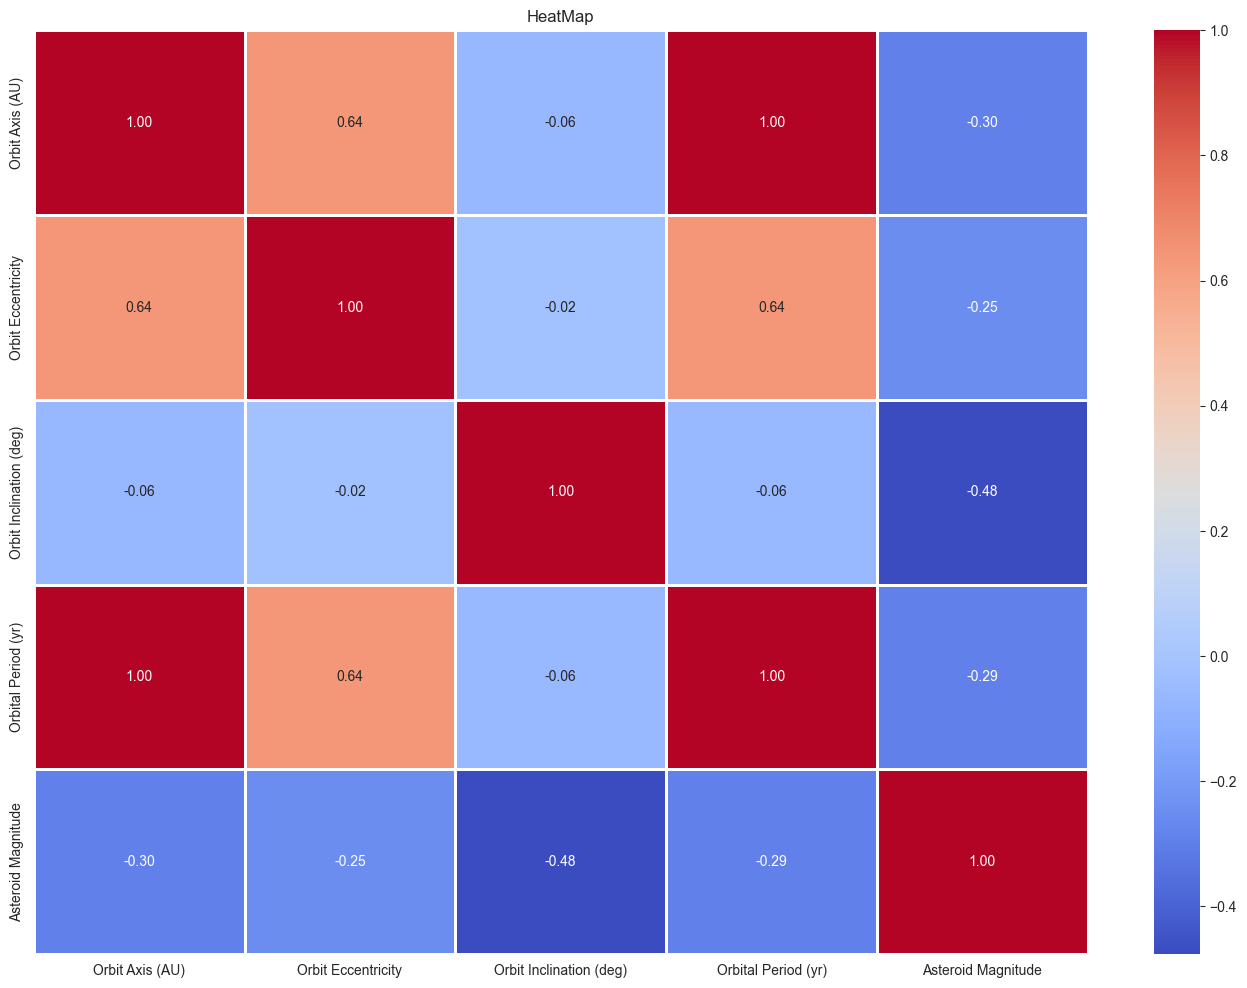

In [110]:
# Visualising with heatmap
plt.figure(figsize=(17, 12))
heat_map = sns.heatmap(asteroid_df.corr(numeric_only=True), cmap="coolwarm", linewidths=1, annot=True, fmt=".2f")
plt.title("HeatMap")
plt.show()

In [86]:
# Extract features from the df
asteroid_features = asteroid_df.columns.tolist()
print(asteroid_features)

['Object Classification', 'Orbit Axis (AU)', 'Orbit Eccentricity', 'Orbit Inclination (deg)', 'Orbital Period (yr)', 'Asteroid Magnitude']


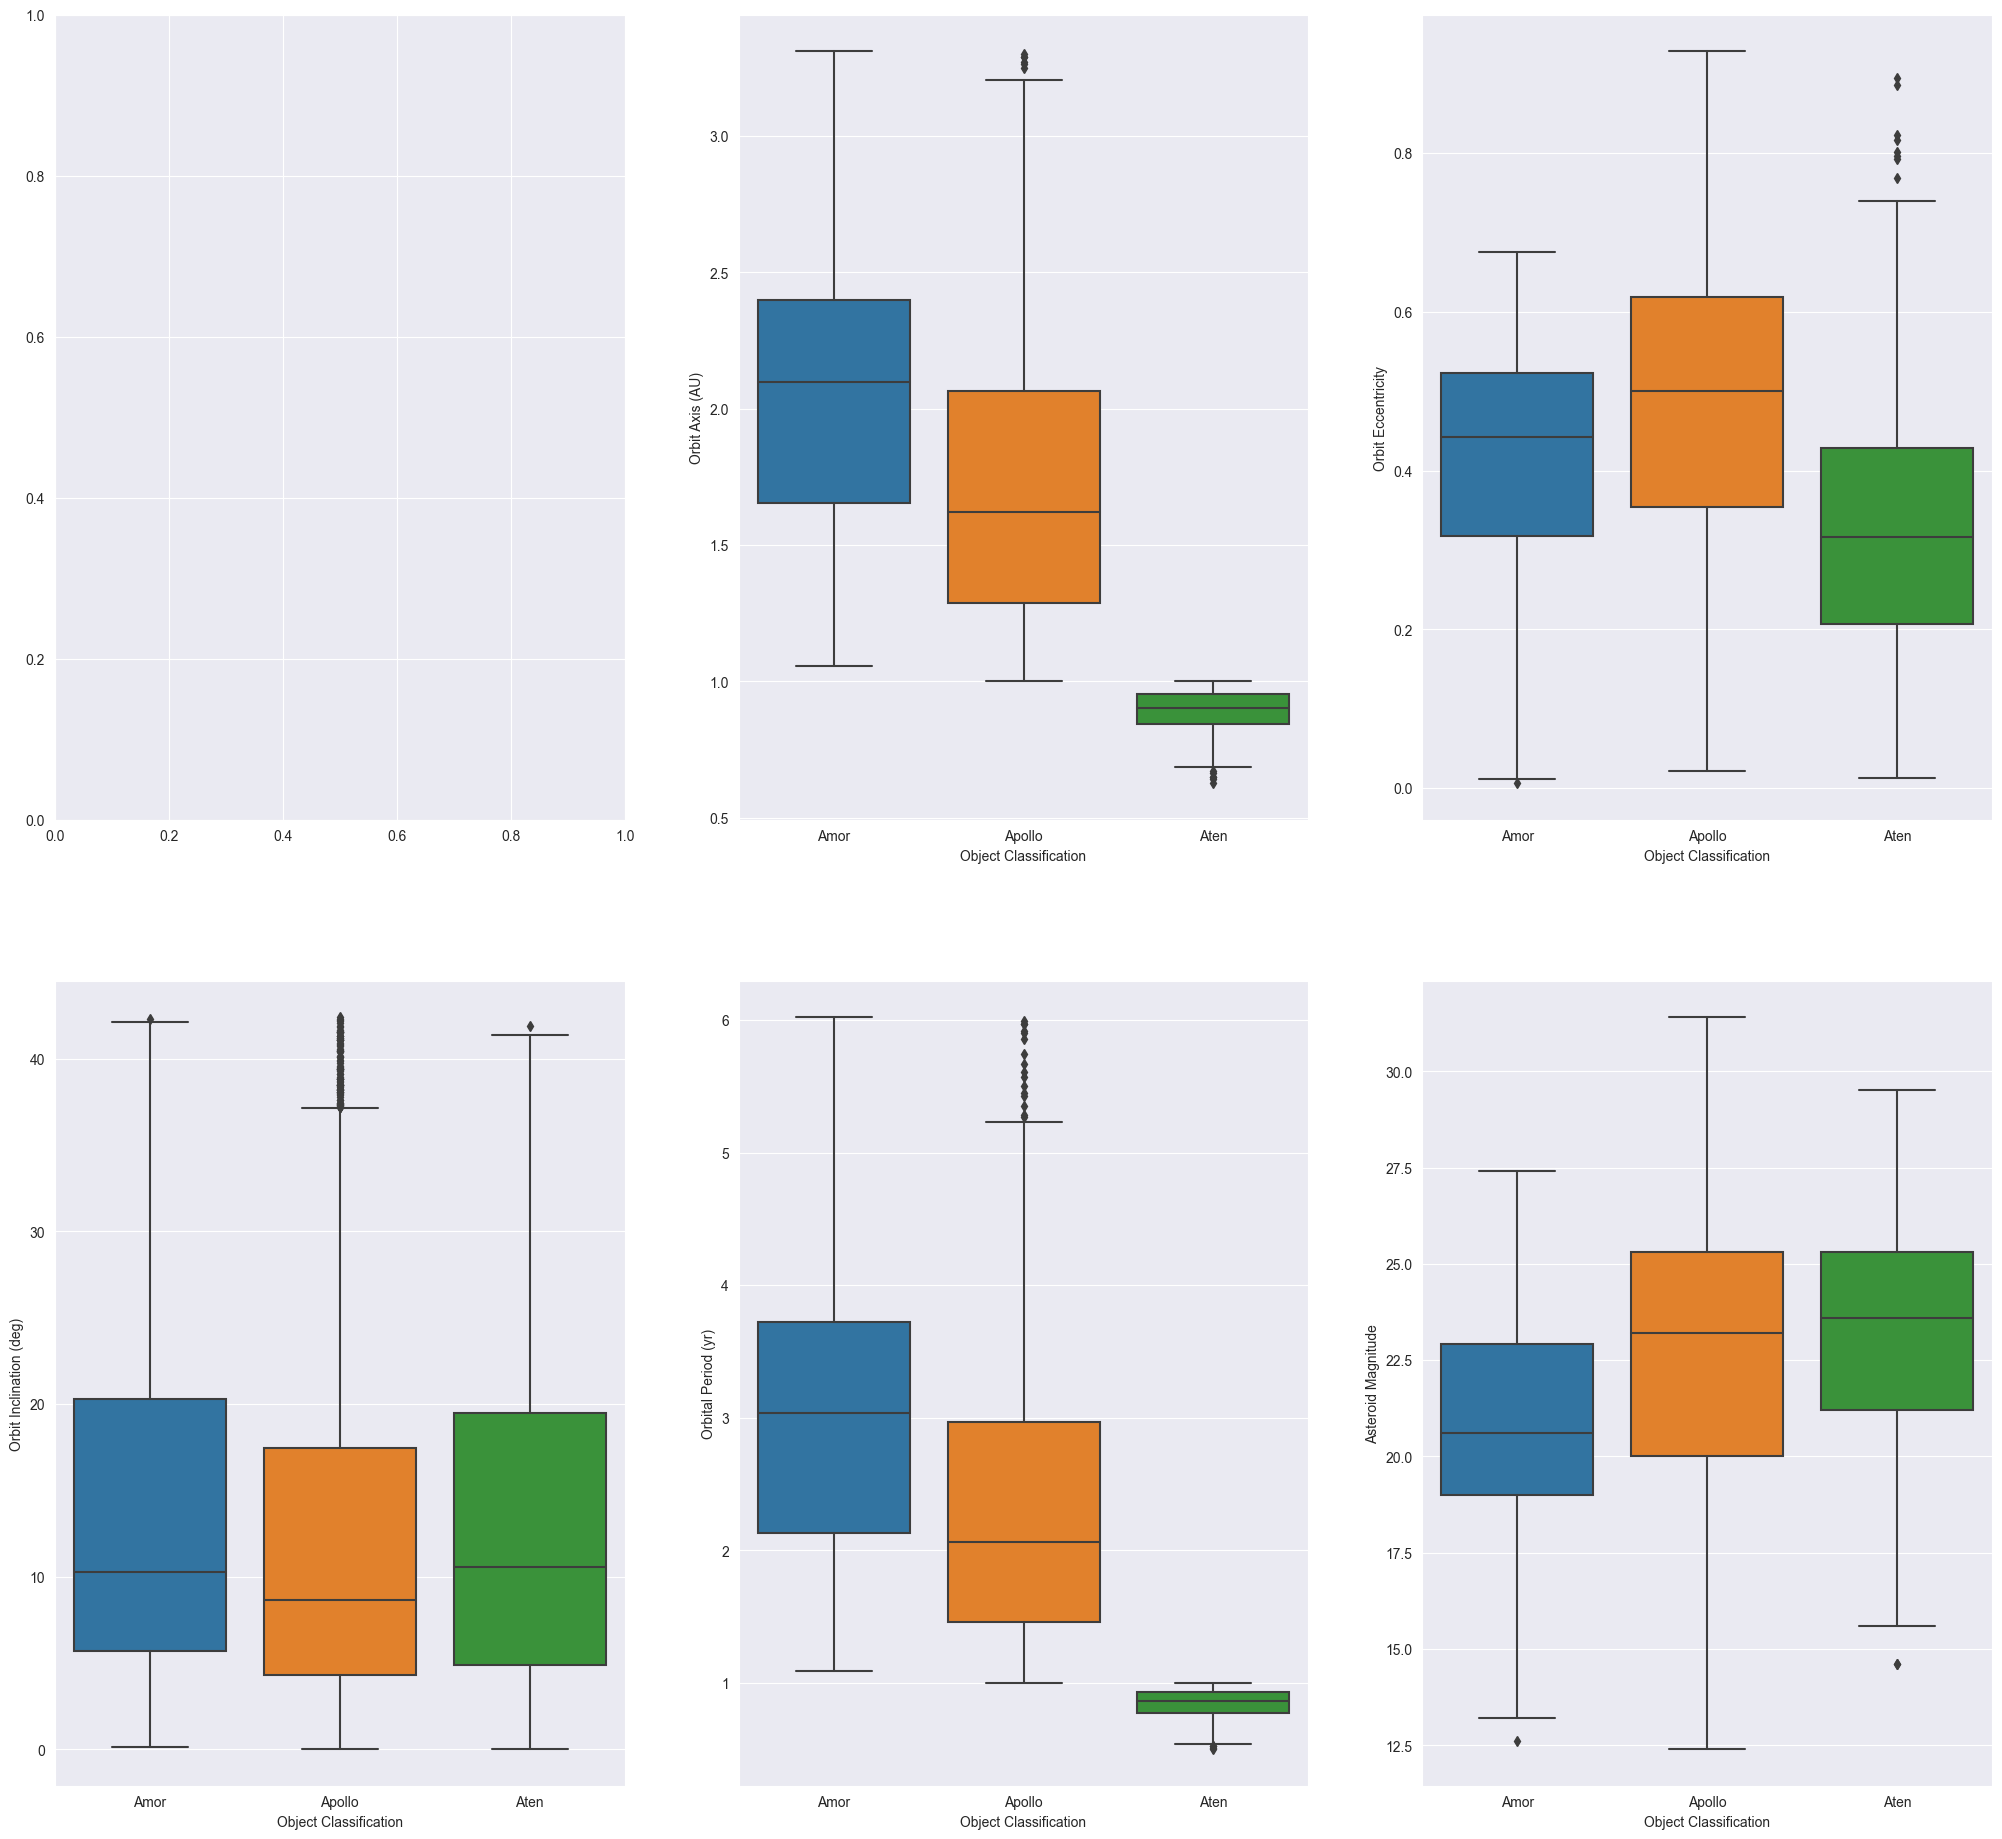

In [112]:
# Show boxplot to check for outliers
boxplot_data(asteroid_df, asteroid_features, 0)

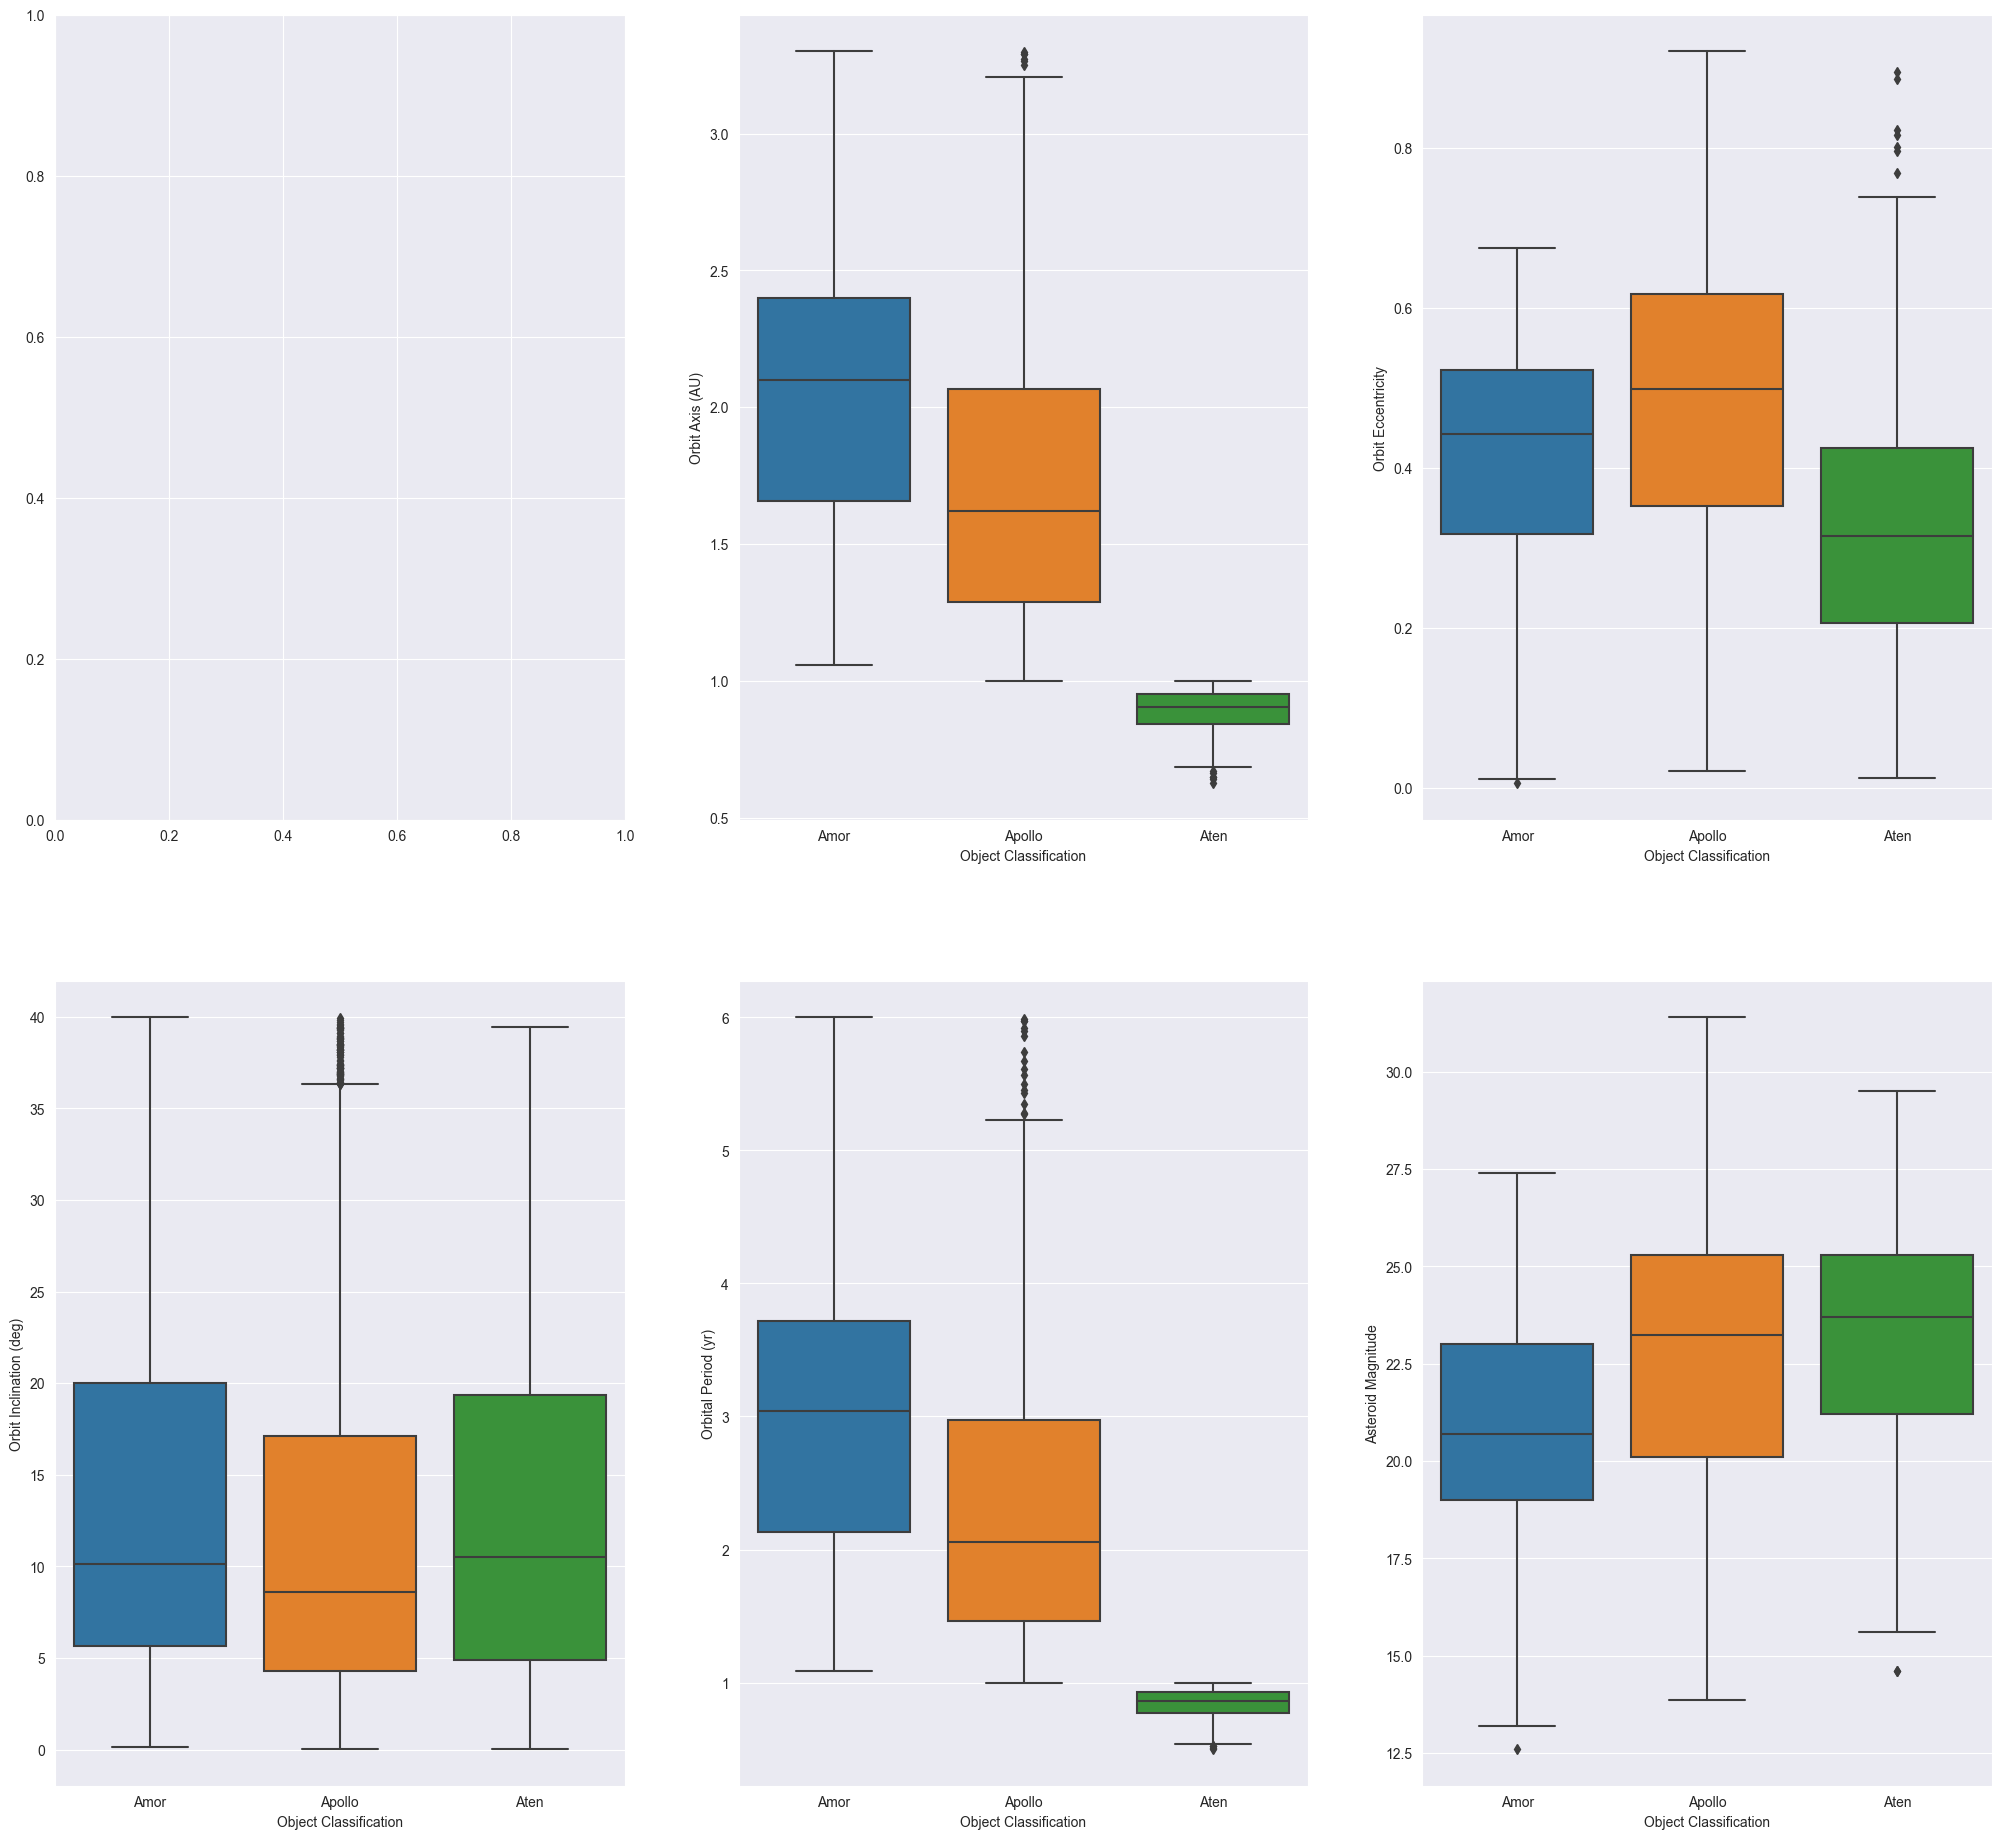

In [113]:
# Remove outliers from the dataframe
asteroid_df = remove_outliers(asteroid_df, asteroid_features)

# Show the boxplot
boxplot_data(asteroid_df, asteroid_features, 0)

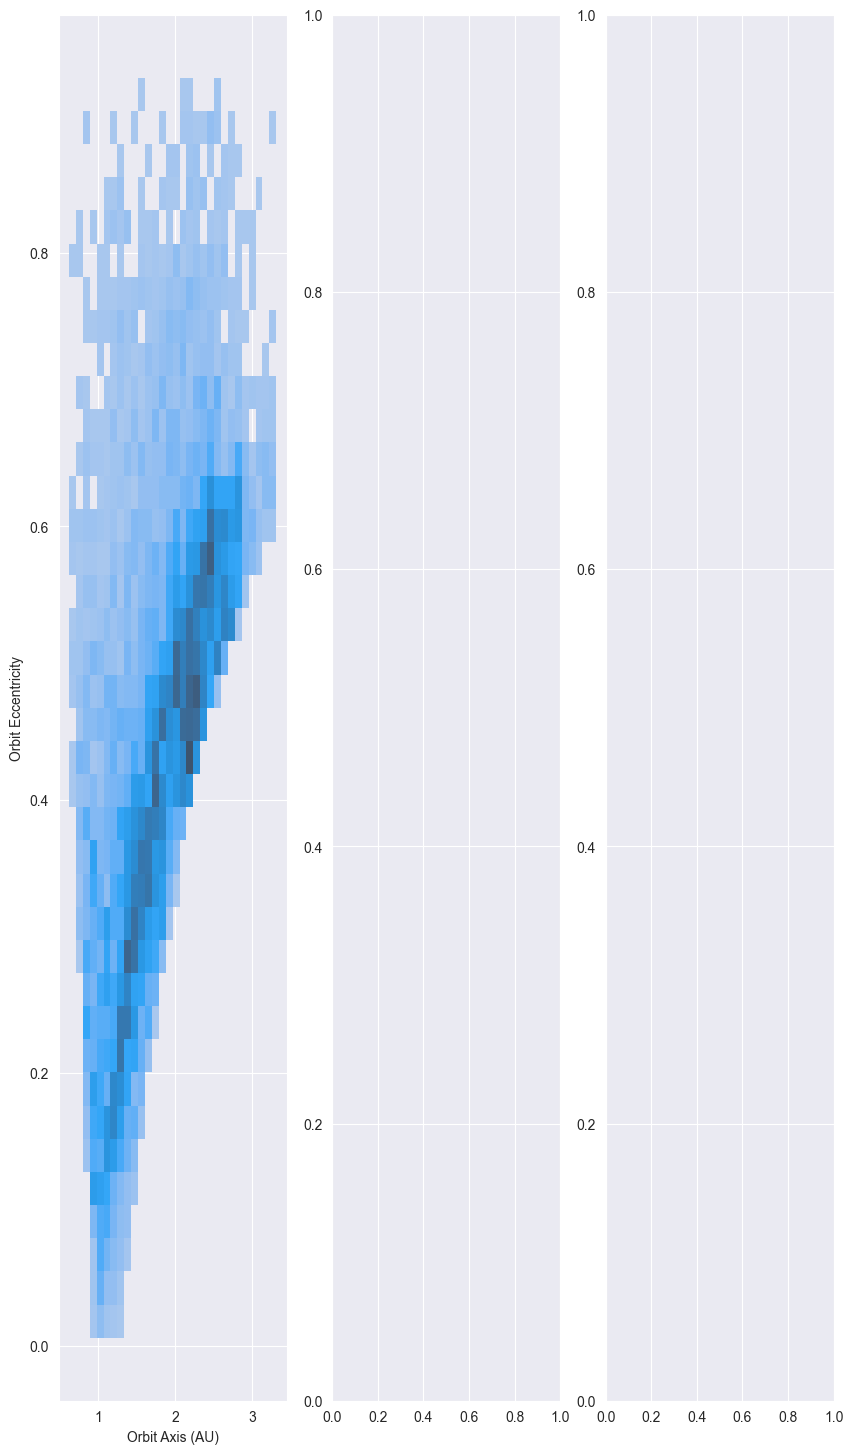

IndexError: list index out of range

In [89]:
# Show histogram plot for our dataframe
histogram_data(asteroid_df, asteroid_features)

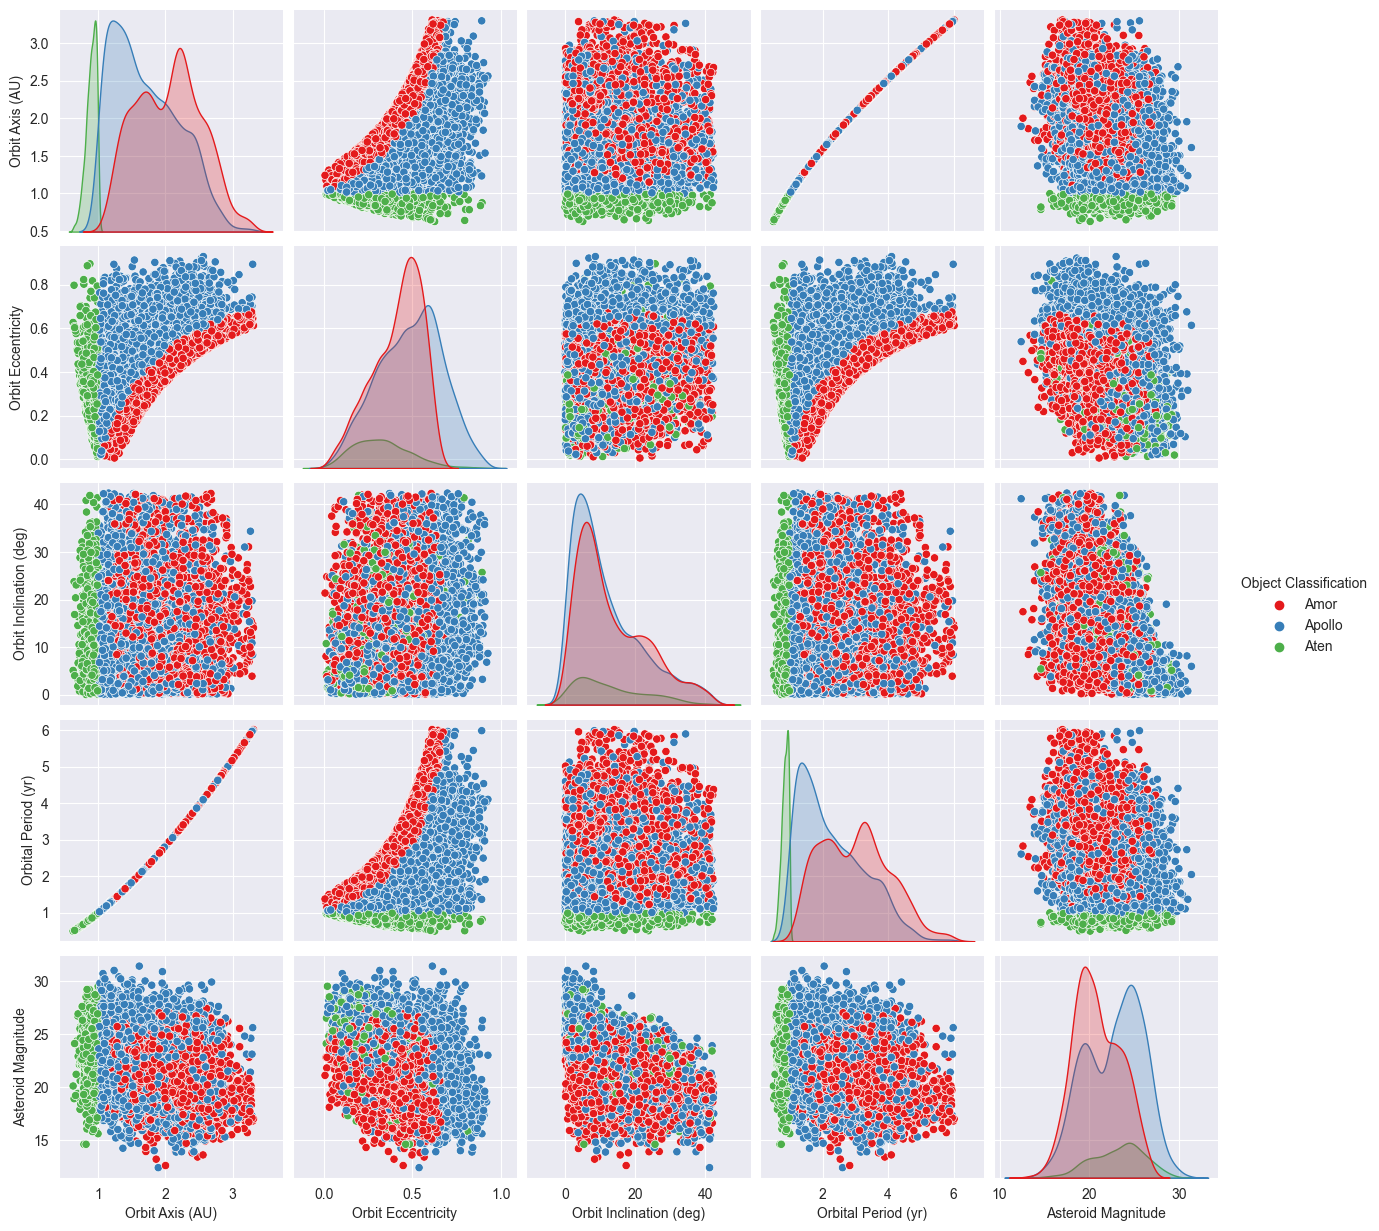

In [90]:
# Show pair plot for our features
sns.pairplot(asteroid_df, hue=asteroid_features[0], palette="Set1")

## Normalizing Dataset

In [91]:
# Create normalized dataset
norm_asteroid_df = asteroid_df.copy()
# apply normalization techniques
for column in norm_asteroid_df:
    if norm_asteroid_df[column].dtype == object:
        continue
    norm_asteroid_df[column] = norm_asteroid_df[column] / norm_asteroid_df[column].abs().max()

In [92]:
# View normalized Dataset
print(norm_asteroid_df.head())

  Object Classification  Orbit Axis (AU)  Orbit Eccentricity  \
1                  Amor         0.796889            0.590282   
2                  Amor         0.748626            0.610967   
4                  Amor         0.579613            0.469295   
8                  Amor         0.562609            0.427279   
9                Apollo         0.412957            0.469619   

   Orbit Inclination (deg)  Orbital Period (yr)  Asteroid Magnitude  
1                 0.273170             0.712625            0.493631  
2                 0.220667             0.647841            0.426752  
4                 0.280182             0.441860            0.563694  
8                 0.199325             0.421927            0.420382  
9                 0.221247             0.265781            0.453185  


In [93]:
asteroid_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7746 entries, 1 to 9380
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Object Classification    7746 non-null   object 
 1   Orbit Axis (AU)          7746 non-null   float64
 2   Orbit Eccentricity       7746 non-null   float64
 3   Orbit Inclination (deg)  7746 non-null   float64
 4   Orbital Period (yr)      7746 non-null   float64
 5   Asteroid Magnitude       7746 non-null   float64
dtypes: float64(5), object(1)
memory usage: 423.6+ KB


## Split Dataset to Train & Test

In [94]:
# Get x & y variables (data & labels)
x = norm_asteroid_df.drop(["Object Classification"], axis=1)
y = norm_asteroid_df["Object Classification"]

In [95]:
# Create train test split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20)

In [96]:
# View splitting result
print(type(X_train), type(y_train))
print(X_train.shape, y_train.shape)

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'>
(6196, 5) (6196,)


In [97]:
# View class names
print(set(y))

{'Apollo', 'Amor', 'Aten'}


## Training Classification Algorithms

### Decision Tree

In [124]:
model = DecisionTreeClassifier(criterion="gini", max_depth=7)

In [125]:
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [122]:
y_pred = model.predict(X_test)

#### Model Evaluation

In [117]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        Amor       0.97      0.97      0.97       656
      Apollo       0.97      0.97      0.97       762
        Aten       1.00      1.00      1.00       132

    accuracy                           0.97      1550
   macro avg       0.98      0.98      0.98      1550
weighted avg       0.97      0.97      0.97      1550



In [118]:
print(confusion_matrix(y_test, y_pred))

[[637  19   0]
 [ 21 741   0]
 [  0   0 132]]


#### Visualization

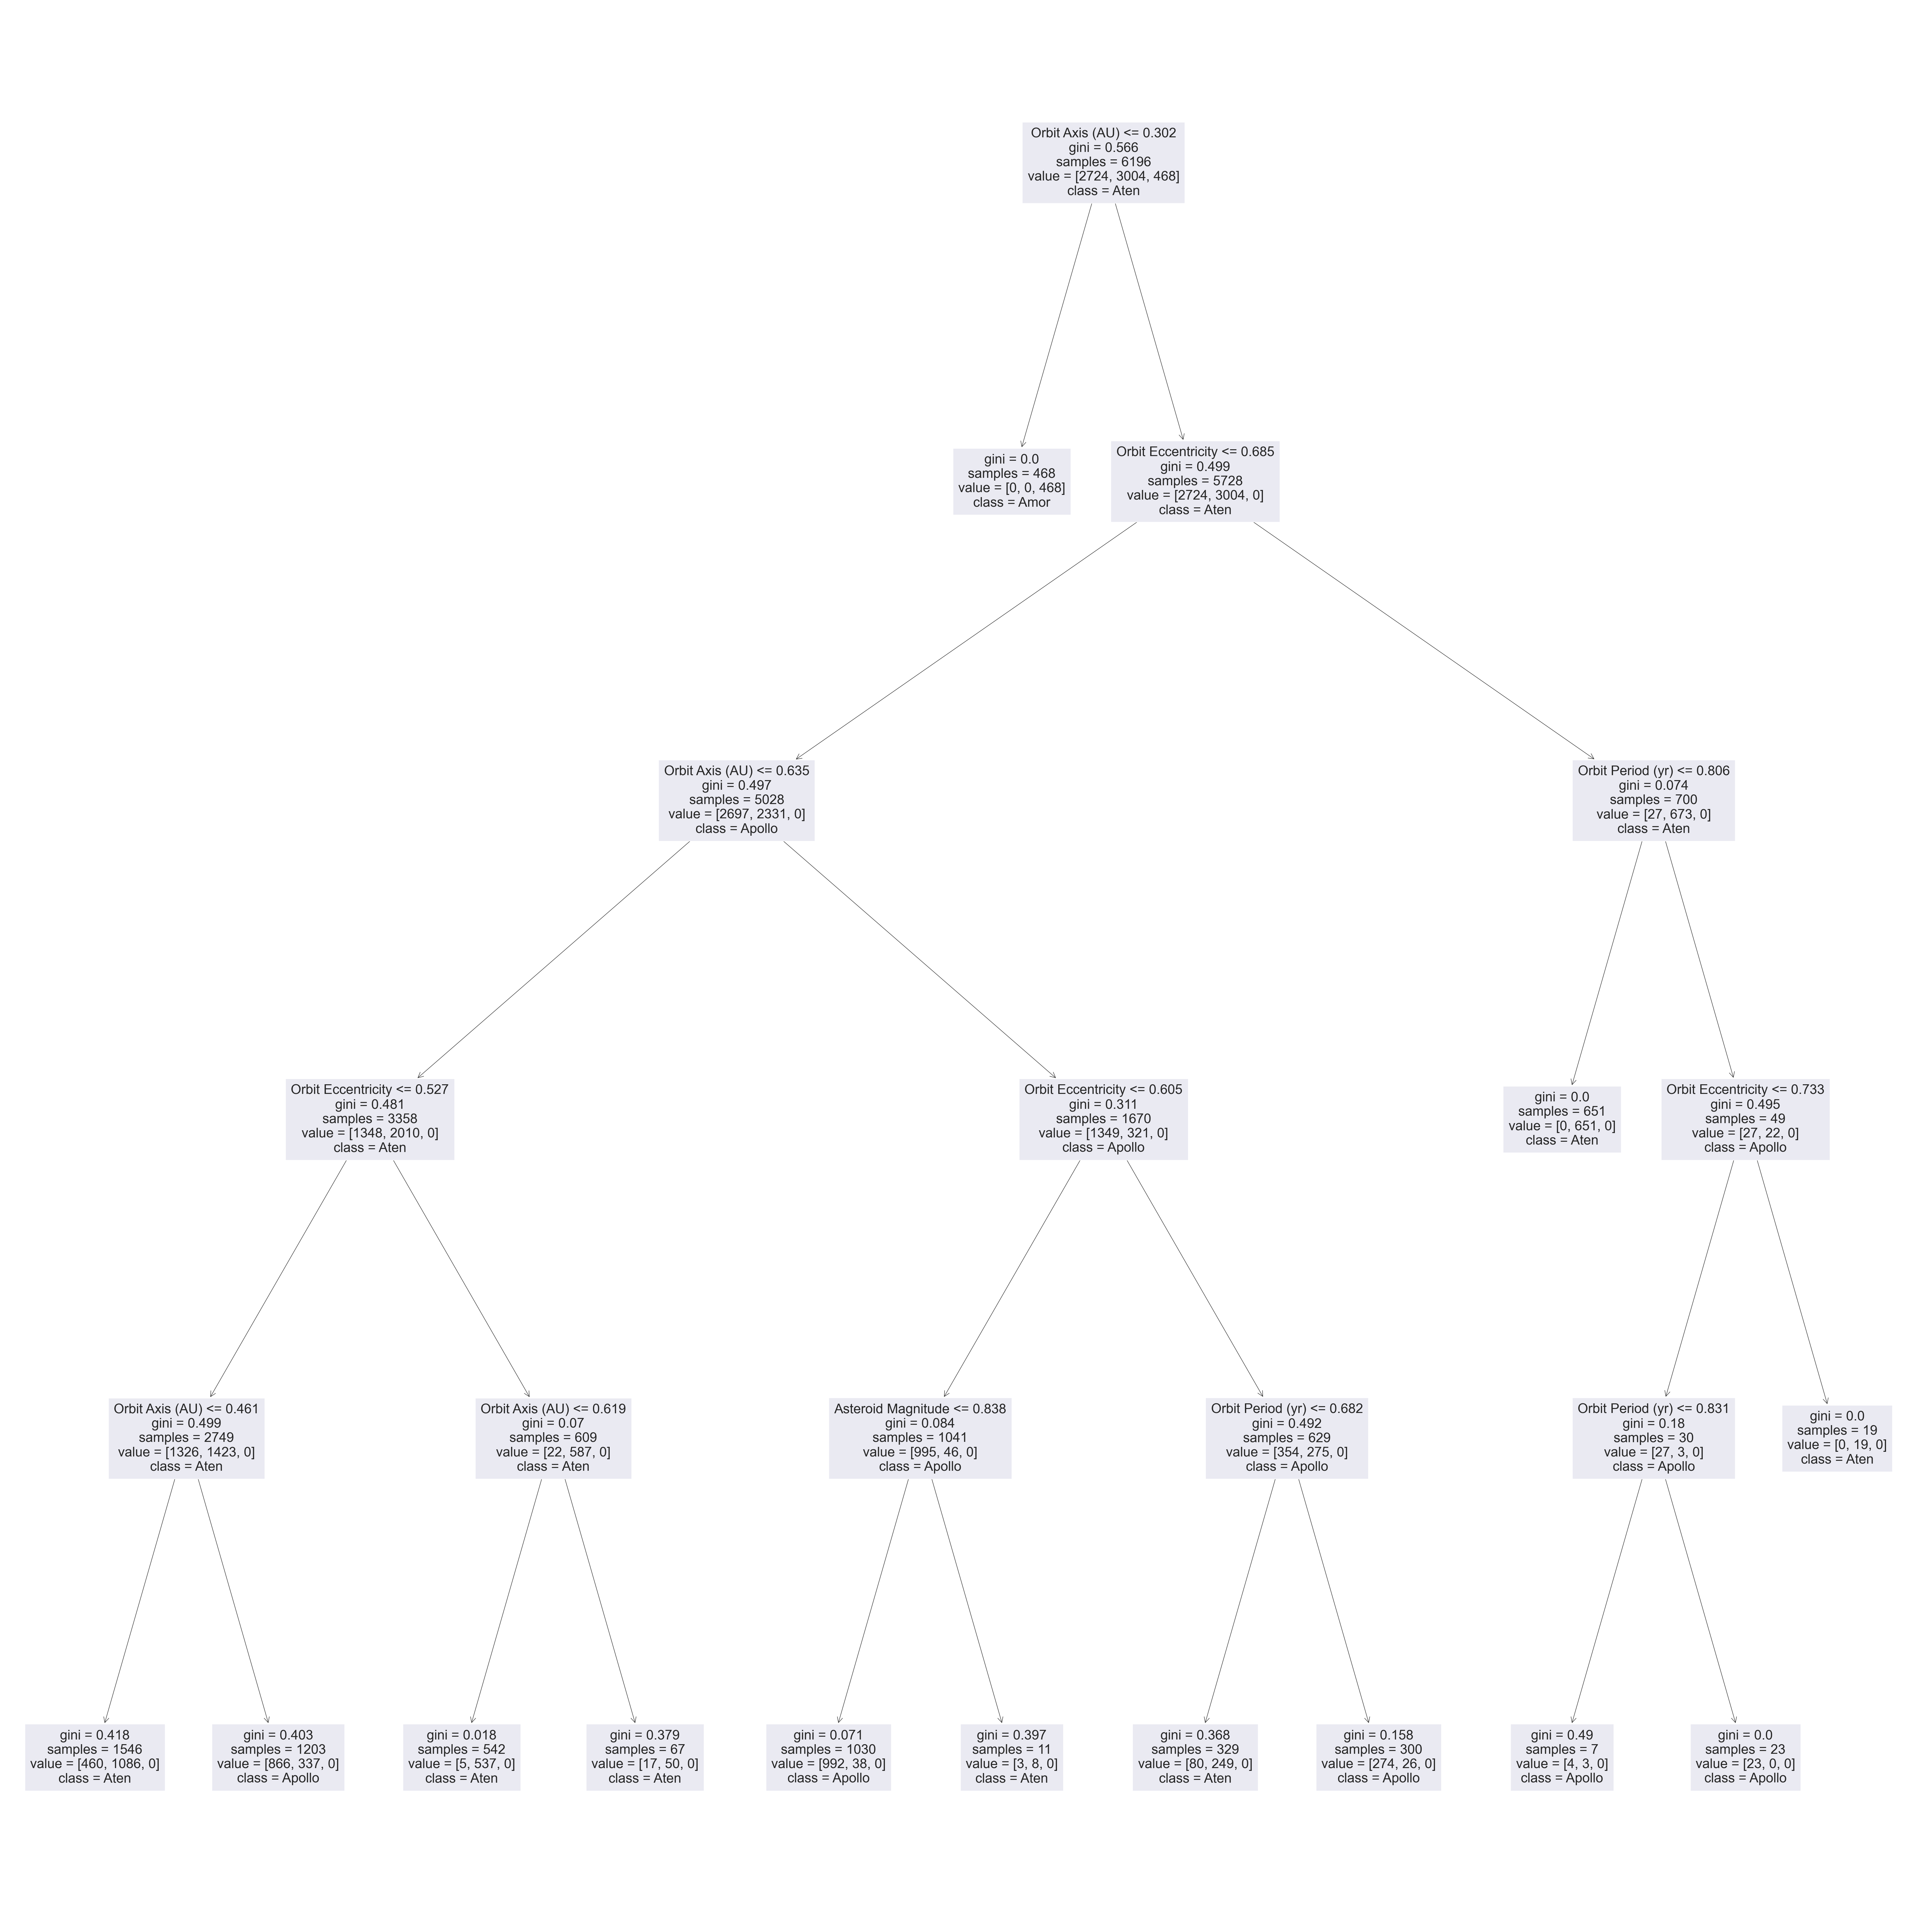

In [126]:
plt.figure(figsize=(80, 80))
plot_tree(model, feature_names=["Orbit Axis (AU)", "Orbit Eccentricity", "Orbit Inclination (deg)",
                                "Orbit Period (yr)", "Asteroid Magnitude"],
          class_names=["Apollo", "Aten", "Amor"])
plt.show()

### Random Forest

In [129]:
# One-hot Encoding the Object Classification Feature
one_hot = OneHotEncoder()
encoded = one_hot.fit_transform(norm_asteroid_df[["Object Classification"]])
norm_asteroid_df[one_hot.categories_[0]] = encoded.toarray()
# Drop unnecessary "Object Classification" feature
norm_asteroid_df.drop(["Object Classification"], axis=1, inplace=True)
print(norm_asteroid_df.head())

      Orbit Axis (AU)  Orbit Eccentricity  Orbit Inclination (deg)  \
1            0.796889            0.590282                 0.273170   
2            0.748626            0.610967                 0.220667   
4            0.579613            0.469295                 0.280182   
8            0.562609            0.427279                 0.199325   
9            0.412957            0.469619                 0.221247   
...               ...                 ...                      ...   
9376         0.541528            0.428248                 0.276069   
9377         0.449955            0.713747                 0.730556   
9378         0.338750            0.214501                 0.331402   
9379         0.499215            0.466171                 0.385543   
9380         0.273996            0.156540                 0.096679   

      Orbital Period (yr)  Asteroid Magnitude  Amor  Apollo  Aten  
1                0.712625            0.493631   1.0     0.0   0.0  
2                0.6478

In [135]:
# Change data type in one-hot encoded column
column_dtype_dict = {"Amor": int,
                     "Apollo": int,
                     "Aten": int}
norm_asteroid_df = norm_asteroid_df.astype(column_dtype_dict)
print(norm_asteroid_df.dtypes)
print(norm_asteroid_df.head())

Orbit Axis (AU)            float64
Orbit Eccentricity         float64
Orbit Inclination (deg)    float64
Orbital Period (yr)        float64
Asteroid Magnitude         float64
Amor                         int32
Apollo                       int32
Aten                         int32
dtype: object
   Orbit Axis (AU)  Orbit Eccentricity  Orbit Inclination (deg)  \
1         0.796889            0.590282                 0.273170   
2         0.748626            0.610967                 0.220667   
4         0.579613            0.469295                 0.280182   
8         0.562609            0.427279                 0.199325   
9         0.412957            0.469619                 0.221247   

   Orbital Period (yr)  Asteroid Magnitude  Amor  Apollo  Aten  
1             0.712625            0.493631     1       0     0  
2             0.647841            0.426752     1       0     0  
4             0.441860            0.563694     1       0     0  
8             0.421927            0.420382 

In [139]:
# Split Dataset
x = norm_asteroid_df.drop(["Apollo", "Aten", "Amor"], axis=1)
y = norm_asteroid_df[["Apollo", "Aten", "Amor"]]
# Split to train test sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20)

In [142]:
# View x_train & y_train
print(f"X-train:\n{X_train.head()}")
print(f"Y-train:\n{y_train.head()}")

X-train:
      Orbit Axis (AU)  Orbit Eccentricity  Orbit Inclination (deg)  \
8724         0.355240            0.247684                 0.046949   
3237         0.668559            0.578431                 0.071773   
2979         0.379311            0.233355                 0.186470   
210          0.732105            0.682073                 0.752028   
1523         0.437028            0.356066                 0.432305   

      Orbital Period (yr)  Asteroid Magnitude  
8724             0.212625            0.910828  
3237             0.546512            0.840764  
2979             0.234219            0.872611  
210              0.626246            0.442675  
1523             0.289037            0.595541  
Y-train:
      Apollo  Aten  Amor
8724       1     0     0
3237       0     0     1
2979       1     0     0
210        1     0     0
1523       1     0     0


### AdaBoost

### kNN (K Nearest Neighbors)

### SVM (Support Vector Machine)

## Choosing optimal parameter for kNN & SVM

### kNN

### SVM

## Choosing best model

### Classification report

### Confusion matrix

### Best model is